In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [16]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [18]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    if predictions is not None:
         plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size":14});

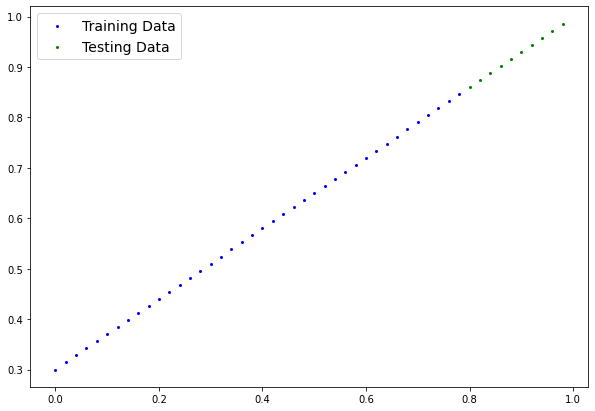

In [19]:
plot_predictions()

In [20]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                requires_grad=True, # <- can we update this value with gradient descent?
                                                dtype=torch.float # <- PyTorch loves float32 by default
        ))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True,
                                             dtype=torch.float
        ))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [21]:
#Create a random seed
torch.manual_seed(42)


model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [23]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

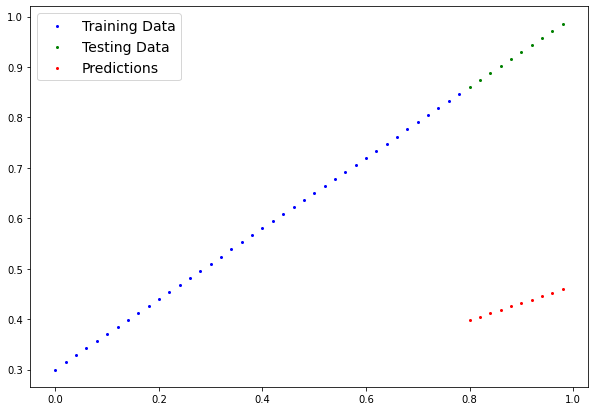

In [24]:
plot_predictions(predictions=y_preds)

In [36]:
#Setup loss function
loss_fn = nn.L1Loss()

#Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001) #lr = learning rate

In [37]:
# an epoch is one loop through the data
epochs = 1000

#Track different values
epoch_count = []
loss_values = ()
test_loss_values = []

#0. loop through the data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

    #1. forward pass
    y_pred = model_0(X_train)
    
    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print("Loss", loss)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on loss with respect to parameters of the model
    loss.backward()
    
    #5. Step the optimizer, perform gradient descent
    optimizer.step()
    
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode(): # turns off gradient tracking
        #1. do the forward pass
        test_pred = model_0(X_test)
        
        #2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)

if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

Loss tensor(0.0089, grad_fn=<L1LossBackward0>)
Loss tensor(0.0088, grad_fn=<L1LossBackward0>)
Loss tensor(0.0087, grad_fn=<L1LossBackward0>)
Loss tensor(0.0086, grad_fn=<L1LossBackward0>)
Loss tensor(0.0085, grad_fn=<L1LossBackward0>)
Loss tensor(0.0084, grad_fn=<L1LossBackward0>)
Loss tensor(0.0082, grad_fn=<L1LossBackward0>)
Loss tensor(0.0081, grad_fn=<L1LossBackward0>)
Loss tensor(0.0080, grad_fn=<L1LossBackward0>)
Loss tensor(0.0079, grad_fn=<L1LossBackward0>)
Loss tensor(0.0078, grad_fn=<L1LossBackward0>)
Loss tensor(0.0077, grad_fn=<L1LossBackward0>)
Loss tensor(0.0076, grad_fn=<L1LossBackward0>)
Loss tensor(0.0074, grad_fn=<L1LossBackward0>)
Loss tensor(0.0073, grad_fn=<L1LossBackward0>)
Loss tensor(0.0072, grad_fn=<L1LossBackward0>)
Loss tensor(0.0071, grad_fn=<L1LossBackward0>)
Loss tensor(0.0070, grad_fn=<L1LossBackward0>)
Loss tensor(0.0069, grad_fn=<L1LossBackward0>)
Loss tensor(0.0067, grad_fn=<L1LossBackward0>)
Loss tensor(0.0066, grad_fn=<L1LossBackward0>)
Loss tensor(0

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

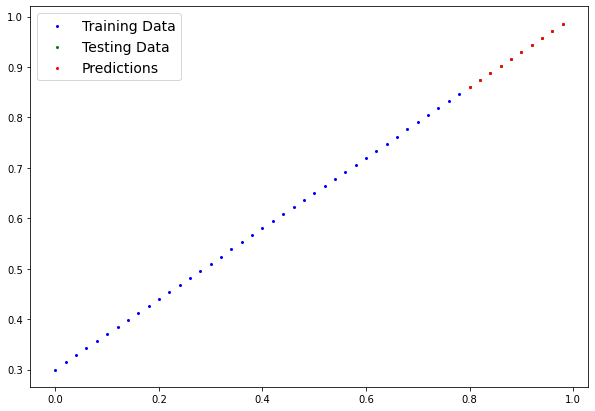

In [38]:
plot_predictions(predictions=test_pred)

In [40]:
#Savjng a model
from pathlib import Path

#1. Creare models directory
MODELPATH = Path("models")
MODELPATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODELNAME = "01-Wrong-inputs-right-output.pth"
MODELSAVEPATH = MODELPATH / MODELNAME

#3. save state dict
torch.save(model_0.state_dict(), MODELSAVEPATH)

In [41]:
#Loading
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODELSAVEPATH))

<All keys matched successfully>

In [42]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])